#### This notebook is to perform Redundancy analysis on beta diversities

In [1]:
library(vegan)
library(ggplot2)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



In [25]:
mf = read.csv('mapping_sleep_alpha.txt', sep='\t')
colnames(mf)[1] = 'SampleName'
dim(mf)

[1] 599  80

In [26]:
head(mf)

,SampleName,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,⋯,M1ADEPR,M1BENZO,AMAMPT_C1,AMFVT_C1,AMPHIT_15SD,Description,alpha_pd,observed_otus,shannon,pielou_e
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,BI0023,TCTGGTGACATT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,Missing:not collected,Missing:not collected,Missing:not collected,Orwoll.BI0023.BI,27.77117,302,5.727116,0.6951729
2,BI0056,CAAGCATGCCTA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,1.0,1.0,0.0,Orwoll.BI0056.BI,17.93266,173,3.888281,0.5229960
3,BI0131,CTATTTGCGACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,1.0,1.0,0.0,Orwoll.BI0131.BI,21.45366,223,4.050730,0.5192645
4,BI0153,ATCGGCGTTACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,1.0,1.0,-1.0,Orwoll.BI0153.BI,18.46968,223,4.894253,0.6273959
5,BI0215,CCTCTCGTGATC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,1.0,0.0,-1.0,Orwoll.BI0215.BI,20.04983,222,5.295055,0.6793396
6,BI0353,TGCCATCTGAAT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,1.0,1.0,0.0,Orwoll.BI0353.BI,13.75183,155,4.213016,0.5790192


In [27]:
distance = read.table('distance-matrix.tsv', header=TRUE, sep='\t',row.names = 1)
distance <- distance[ , order(colnames(distance))]
distance <- distance[ order(rownames(distance)), ]
distance[] <- lapply(distance, as.numeric)
pc_10 = distance[, 1:10]
colnames(pc_10) = c('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')
pc_10$SampleName <- rownames(pc_10) 
dim(pc_10)
head(pc_10)              

[1] 599  11

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,SampleName
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
BI0023,0.000000,3.854117,2.2624907,2.4775439,2.5230138,1.7619373,2.1528977,1.9830176,2.6162961,3.2161124,BI0023
BI0056,3.854117,0.000000,1.9646308,1.5220292,1.3861677,2.2796945,2.1249924,1.9383154,1.3795474,0.7936802,BI0056
BI0131,2.262491,1.964631,0.0000000,0.4890927,1.1557511,1.4876324,0.2544336,1.0246636,0.7861452,1.2313847,BI0131
BI0153,2.477544,1.522029,0.4890927,0.0000000,0.7256925,1.3117906,0.6347898,0.8148648,0.3597706,0.7980843,BI0153
BI0215,2.523014,1.386168,1.1557511,0.7256925,0.0000000,0.9155407,1.2265470,0.5707754,0.5491120,0.8728960,BI0215
BI0353,1.761937,2.279694,1.4876324,1.3117906,0.9155407,0.0000000,1.4634691,0.5320803,1.2680218,1.7699147,BI0353


In [28]:
dat = merge(mf, pc_10, by='SampleName')
dim(dat)

[1] 599  90

In [29]:
# convert categorial to factors
vars_cat = c('GIERACE', 'SITE', 'GIMSTAT', 'MHDIAB', 'MHRHEU1', 'MHOA', 'MHCHF', 'MHMI', 'MHDEPR', 
             'TUDRAMT_REVISED', 'PQPSLMED', 'PQPSQUAL', 'QLCOMP', 'SLEEPHRS', 'PQBADSLP', 
             'TURSMOKE', 'M1ADEPR', 'M1BENZO', 'PQPEFFIC', 'AMAMPT_C1', 'AMFVT_C1', 'AMPHIT_15SD')
dat[vars_cat] = lapply(dat[vars_cat], factor)

# # convert continuous to numeric
vars_cts = c('Age', 'BMI', 'PASCORE')
vars_pcs = c('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')

dat = dat[c(vars_cat, vars_cts, vars_pcs)]
dat = dat[complete.cases(dat), ]
X = dat[c(vars_cat, vars_cts)]
Y = dat[, vars_pcs]

dim(X)
dim(Y)

head(X)
head(Y)

[1] 599  25

[1] 599  10

,GIERACE,SITE,GIMSTAT,MHDIAB,MHRHEU1,MHOA,MHCHF,MHMI,MHDEPR,TUDRAMT_REVISED,⋯,TURSMOKE,M1ADEPR,M1BENZO,PQPEFFIC,AMAMPT_C1,AMFVT_C1,AMPHIT_15SD,Age,BMI,PASCORE
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
1,1:WHITE,Birmingham,2: Widowed,0: No,0: No,0: No,0: No,0: No,0: No,1: Less than one drink per week,⋯,M:Not Applicable,0: No,0: No,0:>85% EFFICIENCY,Missing:not collected,Missing:not collected,Missing:not collected,83,28.89012,91.00000
2,1:WHITE,Birmingham,1: Married,0: No,1: Yes,1: Yes,1: Yes,1: Yes,0: No,0:None drinker,⋯,1:PAST,0: No,0: No,3:<65% EFFICIENCY,1.0,1.0,0.0,81,28.53980,199.17857
3,1:WHITE,Birmingham,1: Married,0: No,0: No,0: No,0: No,0: No,0: No,0:None drinker,⋯,1:PAST,0: No,0: No,0:>85% EFFICIENCY,1.0,1.0,0.0,83,25.01424,161.71429
4,1:WHITE,Birmingham,1: Married,0: No,0: No,0: No,0: No,0: No,0: No,4: 6-13 drinks per week,⋯,1:PAST,0: No,0: No,0:>85% EFFICIENCY,1.0,1.0,-1.0,79,30.87637,88.21429
5,1:WHITE,Birmingham,1: Married,0: No,0: No,1: Yes,0: No,0: No,0: No,3: 3-5 drinks per week,⋯,1:PAST,0: No,0: No,0:>85% EFFICIENCY,1.0,0.0,-1.0,81,33.58739,256.82143
6,1:WHITE,Birmingham,1: Married,0: No,0: No,0: No,0: No,0: No,0: No,0:None drinker,⋯,1:PAST,0: No,0: No,1:>=75% TO <=85% EFFICIENCY,1.0,1.0,0.0,80,26.41523,179.57143


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.000000,3.854117,2.2624907,2.4775439,2.5230138,1.7619373,2.1528977,1.9830176,2.6162961,3.2161124
2,3.854117,0.000000,1.9646308,1.5220292,1.3861677,2.2796945,2.1249924,1.9383154,1.3795474,0.7936802
3,2.262491,1.964631,0.0000000,0.4890927,1.1557511,1.4876324,0.2544336,1.0246636,0.7861452,1.2313847
4,2.477544,1.522029,0.4890927,0.0000000,0.7256925,1.3117906,0.6347898,0.8148648,0.3597706,0.7980843
5,2.523014,1.386168,1.1557511,0.7256925,0.0000000,0.9155407,1.2265470,0.5707754,0.5491120,0.8728960
6,1.761937,2.279694,1.4876324,1.3117906,0.9155407,0.0000000,1.4634691,0.5320803,1.2680218,1.7699147


In [30]:
mod0 <- rda(Y ~ 1., X)  # Model with intercept only
mod1 <- rda(Y ~ ., X)  # Model with all explanatory variables

In [31]:
step.res <- ordiR2step(mod0, mod1, perm.max = 1000)

Step: R2.adj= 0 
Call: Y ~ 1 
 
                    R2.adjusted
<All variables>    0.0630858980
+ GIERACE          0.0218335043
+ PQPEFFIC         0.0124038293
+ SITE             0.0121444993
+ M1ADEPR          0.0090346327
+ PASCORE          0.0081355199
+ AMFVT_C1         0.0075583255
+ PQPSQUAL         0.0075442989
+ MHDEPR           0.0074424167
+ MHOA             0.0058351973
+ MHDIAB           0.0057865628
+ TURSMOKE         0.0051518306
+ BMI              0.0044739644
+ PQBADSLP         0.0032844769
+ Age              0.0031119391
+ AMAMPT_C1        0.0029607419
+ AMPHIT_15SD      0.0022232762
+ GIMSTAT          0.0015558703
+ QLCOMP           0.0015300621
<none>             0.0000000000
+ PQPSLMED        -0.0006602163
+ MHRHEU1         -0.0010731774
+ M1BENZO         -0.0011421686
+ MHMI            -0.0011819206
+ TUDRAMT_REVISED -0.0013228199
+ MHCHF           -0.0014322133
+ SLEEPHRS        -0.0022838704

          Df    AIC     F Pr(>F)   
+ GIERACE  4 1016.7 4.337  0.002 **

In [32]:
table = step.res$anova
table

,R2.adj,Df,AIC,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
+ GIERACE,0.02183350,4,1016.745,4.336967,0.002
+ PQPEFFIC,0.03275667,4,1013.971,2.677025,0.004
+ SITE,0.04475677,5,1011.395,2.482357,0.008
+ BMI,0.05316453,1,1007.074,6.194713,0.002
+ M1ADEPR,0.06004041,1,1003.682,5.272005,0.006
<All variables>,0.06308590,NA,NA,NA,NA


In [37]:
table$ES.RDA = c(table$R2.adj[1], table$R2.adj[2]-table$R2.adj[1], 
                       table$R2.adj[3]-table$R2.adj[2], table$R2.adj[4]-table$R2.adj[3],
                       table$R2.adj[5]-table$R2.adj[4], table$R2.adj[6]-table$R2.adj[5])
table = table[-6, ]

step.res$call

rda(formula = Y ~ GIERACE + PQPEFFIC + SITE + BMI + M1ADEPR, 
    data = X)

In [38]:
table

,R2.adj,Df,AIC,F,Pr(>F),ES.RDA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Race,0.02183350,4,1016.745,4.336967,0.002,0.021833504
Site,0.03275667,4,1013.971,2.677025,0.004,0.010923170
Diabetes,0.04475677,5,1011.395,2.482357,0.008,0.012000098
PQPEFFIC,0.05316453,1,1007.074,6.194713,0.002,0.008407759
BMI,0.06004041,1,1003.682,5.272005,0.006,0.006875877


null device 
          1

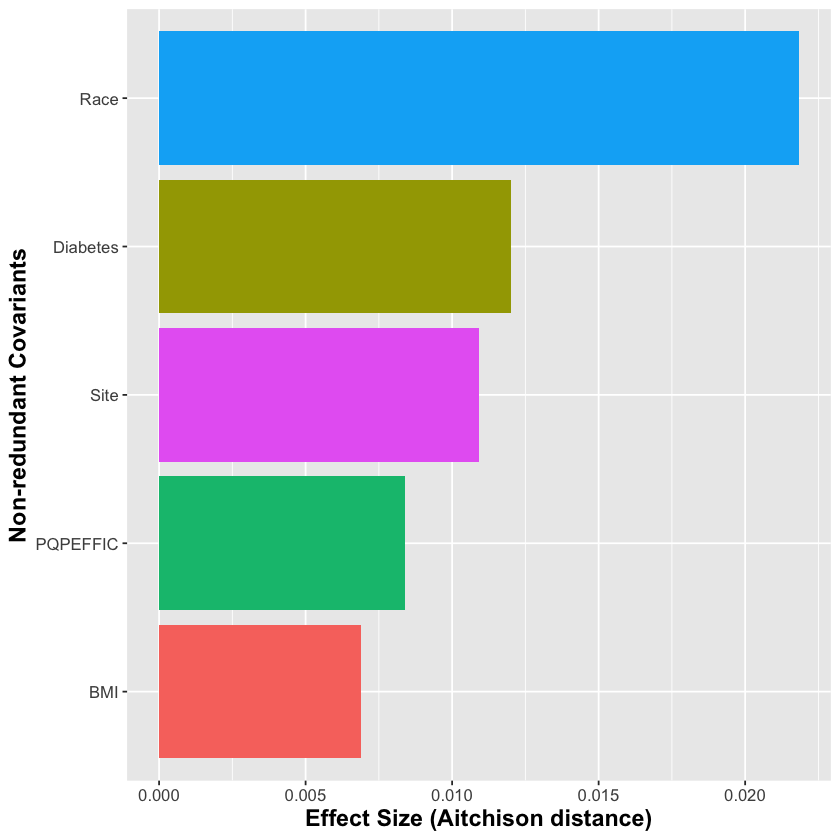

In [39]:
#make plot
covariates = rownames(table)
ggplot(table, aes(x=reorder(covariates, ES.RDA), y=ES.RDA, fill=covariates)) +
  labs(x = 'Non-redundant Covariants', y = 'Effect Size (Aitchison distance)') +
  geom_bar(stat='identity') +
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=14,face="bold"), 
        legend.position="none") + 
  coord_flip()
dev.off()
